In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
signals_data = pd.read_csv("../Data/cellular_signals.csv")
antennas_data = pd.read_csv("../Data/antennas.csv")

In [30]:
signals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   5000 non-null   float64
 1   Longitude  5000 non-null   float64
 2   id         5000 non-null   float64
 3   signal     5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [31]:
antennas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   200 non-null    float64
 1   Longitude  200 non-null    float64
 2   type       200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [6]:
signals_data.head()

,Latitude,Longitude,id,signal
0,30.008101,70.013081,0.0,92.914916
1,30.021438,70.006084,1.0,74.490463
2,30.026115,70.001703,2.0,82.225067
3,30.019904,70.019280,3.0,86.279247
4,30.020316,70.016941,4.0,78.450492


<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

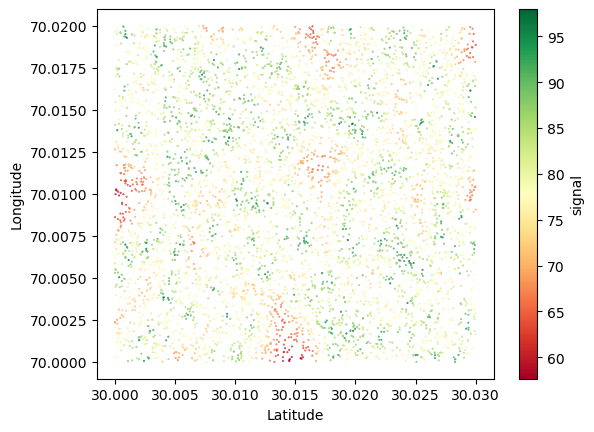

In [14]:
signals_data.plot(kind="scatter", x='Latitude', y='Longitude', s=0.2, c='signal', colormap='RdYlGn', colorbar=True)

<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

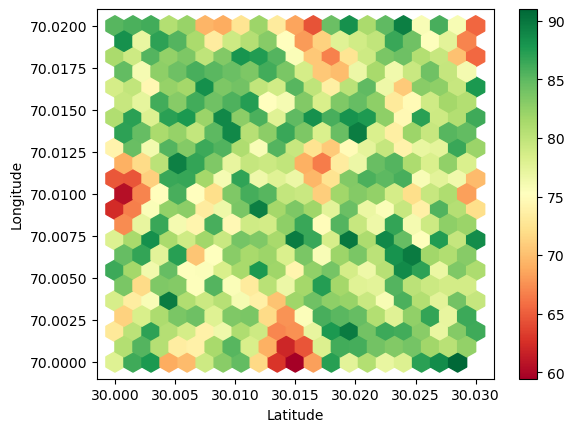

In [18]:
signals_data.plot(kind="hexbin", x='Latitude', y='Longitude', C='signal', gridsize=20, colormap='RdYlGn', colorbar=True)

<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

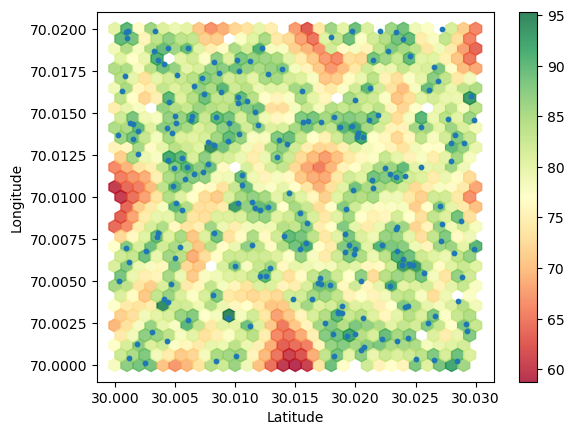

In [24]:
ax = signals_data.plot(kind="hexbin", x='Latitude', y='Longitude', C='signal', 
                       gridsize=30, colormap='RdYlGn', colorbar=True, alpha=0.8)
antennas_data.plot(kind='scatter', x='Latitude', y='Longitude', s=10, ax=ax)

In [27]:
from sklearn.metrics.pairwise import haversine_distances

In [28]:
signals_locations = signals_data[['Latitude', 'Longitude']].values
antennas_locations = antennas_data[['Latitude', 'Longitude']].values

distances = haversine_distances(signals_locations, antennas_locations)

In [29]:
distances.shape

(5000, 200)

In [35]:
closest_antenna_indices = np.argmin(distances, axis=1)

In [36]:
closest_antenna_indices.shape

(5000,)

In [40]:
closest_antenna_types = antennas_data.iloc[closest_antenna_indices]['type'].values

In [45]:
signals_data['closest_antenna_type'] = closest_antenna_types
signals_data['distance_to_closest_antenna'] = np.min(distances, axis=1)*1000

<AxesSubplot: ylabel='Frequency'>

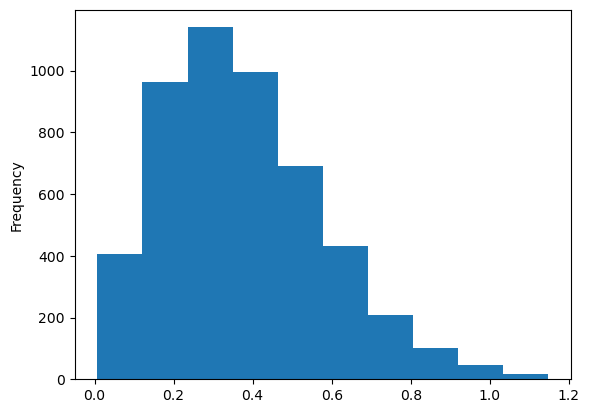

In [49]:
signals_data['distance_to_closest_antenna'].plot(kind='hist')